# Data analysis tools exercise 4: Testing a Potential Moderator

## Dataset: Bike sharing
I am using the bike sharing dataset of https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset, which provides data on how many bikes are rent out on specific hours of specific days, the weather on these days, whether the day was a weekday or not, etc. The dataset contains information on 'registered' users and 'casual' users of the bike rental system.

## Research question

In the first exercise I showed that the number of bikes rented out differs significantly between all pairs of seasons. 
Here I want to see if whether users are casual (assumed to be using bikes mostly for leasure) or registered (assumed to be 
using bikes mostly to commute) is a moderator for this association. 

In [6]:
%matplotlib inline
import numpy
import pandas
import scipy.stats
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
import matplotlib.pyplot as plt

data = pandas.read_csv('day.csv', low_memory=False)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
#The season variable in the data is just the number of the quartal, so I recode my own from the month
recode = {1:"1-Winter",2:"1-Winter",3:"2-Spring",4:"2-Spring",5:"2-Spring",6:"3-Summer",7:"3-Summer",8:"3-Summer",9:"4-Fall",10:"4-Fall",11:"4-Fall",12:"1-Winter"}
data['seasonname'] = data['mnth'].map(recode)
sub=data[['seasonname','cnt','casual','registered']]
ct = sub.groupby('seasonname').mean()
print (ct)

                    cnt       casual   registered
seasonname                                       
1-Winter    2747.629834   269.049724  2478.580110
2-Spring    4509.239130   981.146739  3528.092391
3-Summer    5665.673913  1217.945652  4447.728261
4-Fall      5072.384615   915.857143  4156.527473


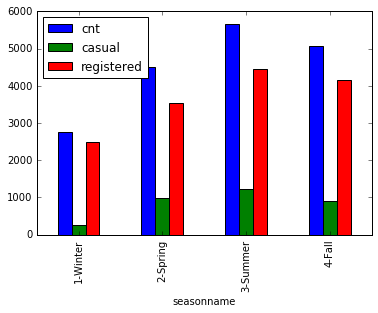

In [27]:
ct.plot(kind='bar');

In [22]:
model = smf.ols(formula='casual ~ C(seasonname)', data=sub)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     85.75
Date:                Sat, 30 Apr 2016   Prob (F-statistic):           1.65e-47
Time:                        12:01:52   Log-Likelihood:                -5700.8
No. Observations:                 731   AIC:                         1.141e+04
Df Residuals:                     727   BIC:                         1.143e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept             

In [23]:
model = smf.ols(formula='registered ~ C(seasonname)', data=sub)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     73.80
Date:                Sat, 30 Apr 2016   Prob (F-statistic):           1.12e-41
Time:                        12:01:55   Log-Likelihood:                -6314.3
No. Observations:                 731   AIC:                         1.264e+04
Df Residuals:                     727   BIC:                         1.266e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept             

## Result of ANOVA
ANOVA shows that there is a significant difference in the mean number of rented out bikes in the different seasons for both casual and registered users, so I do posthoc tests to figure out which difference exactly.

In [24]:
mc = multi.MultiComparison(sub['casual'], sub['seasonname'])
res = mc.tukeyhsd()
print(res.summary())

  Multiple Comparison of Means - Tukey HSD,FWER=0.05  
 group1   group2   meandiff   lower     upper   reject
------------------------------------------------------
1-Winter 2-Spring  712.097   552.6903  871.5037  True 
1-Winter 3-Summer  948.8959  789.4892 1108.3026  True 
1-Winter  4-Fall   646.8074  486.967   806.6479  True 
2-Spring 3-Summer  236.7989  78.0487   395.5492  True 
2-Spring  4-Fall   -65.2896 -224.4754  93.8962  False 
3-Summer  4-Fall  -302.0885 -461.2743 -142.9027  True 
------------------------------------------------------


In [25]:
mc = multi.MultiComparison(sub['registered'], sub['seasonname'])
res = mc.tukeyhsd()
print(res.summary())

  Multiple Comparison of Means - Tukey HSD,FWER=0.05  
 group1   group2   meandiff   lower     upper   reject
------------------------------------------------------
1-Winter 2-Spring 1049.5123  680.5014 1418.5231  True 
1-Winter 3-Summer 1969.1482 1600.1373  2338.159  True 
1-Winter  4-Fall  1677.9474 1307.9325 2047.9623  True 
2-Spring 3-Summer  919.6359  552.1446 1287.1271  True 
2-Spring  4-Fall   628.4351  259.9356  996.9345  True 
3-Summer  4-Fall  -291.2008 -659.7002  77.2987  False 
------------------------------------------------------


The posthoc tests for combined rental counts, for comparison

In [26]:
mc = multi.MultiComparison(sub['cnt'], sub['seasonname'])
res = mc.tukeyhsd()
print(res.summary())

   Multiple Comparison of Means - Tukey HSD,FWER=0.05  
 group1   group2   meandiff   lower      upper   reject
-------------------------------------------------------
1-Winter 2-Spring 1761.6093 1328.7919  2194.4267  True 
1-Winter 3-Summer 2918.0441 2485.2266  3350.8615  True 
1-Winter  4-Fall  2324.7548 1890.7597  2758.7499  True 
2-Spring 3-Summer 1156.4348  725.3997  1587.4698  True 
2-Spring  4-Fall   563.1455  130.9279   995.3631  True 
3-Summer  4-Fall  -593.2893 -1025.5069 -161.0717  True 
-------------------------------------------------------


## Results
For all season pairs but Spring-Fall and Summer-Fall, the kind of bike user does not seem to moderate the amount of bikes rent. 

The mean number of bikes rent by registered users is not significantly different in Summer and Fall. This difference is significant if we look at all bikes rent and casual bikes rent, so here bike rental by casual users contributes to make the overall difference stronger (and significant).

The mean number of bikes rent by casual users is not significantly different in Spring and Fall. This difference is significant if we look at all bikes rent and registered bikes rent. Unlike registered users, casual users rent fewer rather than more bikes in fall than in spring (albeit not significantly so).